In [1]:
import numpy as np
import matplotlib.pyplot as plt
from necklace_model import Necklace
from simulated_annealing import Annealer
%load_ext snakeviz

In [14]:
# Define global variables
ensemble_size = 100 # Number of parallel walkers
max_steps = 100000 # Maximum amount of steps
start_temp = 40 # Start temperature for adapted annealing 
end_temp = -100 # End temperature for adapted annealing
therm_speed = 0.6*10**-5 # Thermodynamic speed

In [15]:
# Run the adapted annealer problem
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
energiesArr,energiesVBSF,temps,degeneracies = anl.run_adapted(ensemble_size=ensemble_size,start_temp=start_temp,end_temp=end_temp,max_steps=max_steps,therm_speed=therm_speed)

/home/chris/Documents/Semester8/PhysicsOfAlgorithms/Assignments/necklace_simulation/simulated_annealing.py:154: RuntimeWarning: invalid value encountered in true_divide
  P = Q / Q.sum(axis=0)


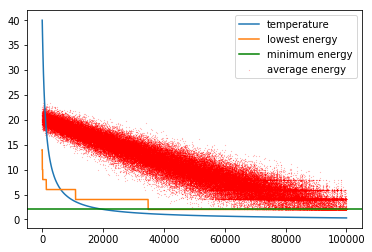

In [16]:
plt.plot(temps,label='temperature')
plt.scatter(np.arange(len(energiesArr)),energiesArr,s=0.01,c='r',label='average energy')
plt.plot(energiesVBSF,label='lowest energy')
plt.axhline(2,c='green',label='minimum energy')
plt.legend()

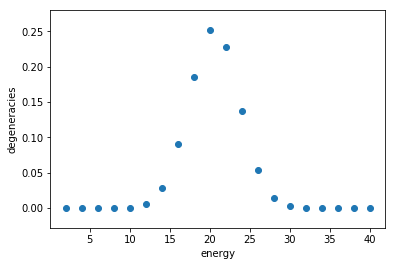

In [17]:
# Degeneracies
plt.ylabel('degeneracies')
plt.xlabel('energy')
plt.scatter(nkl.allEnergies,degeneracies)

The mean energy ($E = 20$) has the highest degeneracy. Degeneracies of other energies follow a gaussian distribution. Hence there are only few states with lowest/highest energy, which are hard to find. That is why we use simulated annealing to find these.

/home/chris/Documents/Semester8/PhysicsOfAlgorithms/Assignments/necklace_simulation/simulated_annealing.py:160: RuntimeWarning: invalid value encountered in true_divide
  P = Q / Q.sum(axis=0)


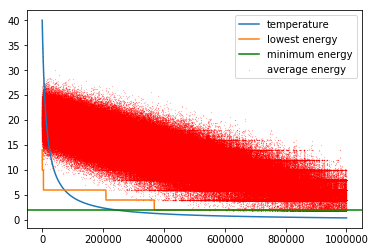

In [24]:
# Define global variables
ensemble_size = 10 # Number of parallel walkers
max_steps = 1000000 # Maximum amount of steps
update_steps = 10 # Number of steps after which the temperature is updated
start_temp = 40 # Start temperature for adapted annealing 
end_temp = 0 # End temperature for adapted annealing
therm_speed = 0.5*10**-5 # Thermodynamic speed
if ensemble_size * max_steps != 10000000: print('Wrong dimensions!') 
# Run the adapted annealer problem
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
energiesArr,energiesVBSF,temps,degeneracies = anl.run_adapted(ensemble_size=ensemble_size,start_temp=start_temp,end_temp=end_temp,max_steps=max_steps,therm_speed=therm_speed,update_steps=update_steps)

# Plot the results
plt.plot(temps,label='temperature')
plt.scatter(np.arange(len(energiesArr)),energiesArr,s=0.01,c='r',label='average energy')
plt.plot(energiesVBSF,label='lowest energy')
plt.axhline(2,c='green',label='minimum energy')
plt.legend()
plt.savefig('plots/ensemble10.png')

See pictures in subfolder plots (named ensemble*.png).  
I observe that for a smaller ensemble size (e.g. 10) the average energy is more distributed than for higher ensemble sizes. That is due to the randomness in the system that fills the degeneracy distribution. If there are only 10 walkers, they might be all on a higher than average energy ( > 20). This case is more unlikely if there is a high number of walkers.